# **IEOR E4650  Business Analytics (Fall 2019)**

##**Lecture 3: Linear Regression**

Linear regression is a commonly used technique when analyzing data. In this lecture, we discuss basics of linear regression.

Learning objective:

(1) Understand the basics of linear regression

(2) Able to use Python to perform linear regression

(3) Able to interpret important statistics

## Framing a Question

There are usually two types questions we are interested in addressing

* Prediction/Classification

> The task is to give an estimate of the value of the dependent variables. For example, we might be interested in how to best predict 
>> the stock price for the next period

>> revenue 

>> house price


>> $\dots$

* Correlation

> If we are interested in how changing the value of one factor will change the other factor. For example, we might be interested in understanding

>> what is the change in profit after running a market campaign? 

>> how does  the new government policy impact our revenue?

>> how does consumer's education level impact the mortgage payment? 

>> $\dots$

Notice the difference here. 

* For the prediction tasks, we really care about an robust predicition. We would like to predict the outcome as accurate as possible when we have a new sample.

* For correlation tasks, we care about identifying the correlation relationship between factors. In this case, we care less about whether the prediction is good. 






##Building up a regression model

<div>
<img src="https://pics.me.me/thumb_pranay-pathole-ppathole-when-you-are-fundraising-al-when-you-45081339.png" width="250"/>
</div>


**Just for fun... Yi does not endorse this tweet**


Linear regression model is one of the most commonly used models for analytics. It is simple, convinient, and can help address both prediction and correlation problems. Especially, linear regression model is an excellent choice if the outcome variable is **continuous**. 


We can construct a linear model as the following:

$$y=\beta_0+\beta_1 x_1 + \beta_2 x_2 +\epsilon$$

Where $y$ is the outcome whose variation can be explained by other factors. This is called the dependent variable. For example, if we want to model the variation in sales, then sales wll become the dependent variable.

$x_1$ and $x_2$ are the factors that could impact the outcomes of the dependent variable. They are also called independent variables.

$\epsilon$ captures all the factors that could affect the outcome, which unfortunately does not exist in our data. An important assumption is `E(\epsilon)=0`. When the sample size is small (say we have fewer than 30 observations), we additionally need to assume that the error term follows normal distribution. 

Especially, if we only have **one** indepent variable, the regression is called **simple linear regression**. However, if we have multiple independent variables, the regression is called **multiple linear regression**.

The task for a linear regression is to estimate the values for $\beta_0$, $\beta_1$, $\beta_2$. We will denote the estimated values using $\widehat{\beta_0}$, $\widehat{\beta_1}$, $\widehat{\beta_2}$.

Once we have recovered our best estimates for $\widehat{\beta_0}$, $\widehat{\beta_1}$, $\widehat{\beta_2}$, we can then move on the the prediction stage. We have

$$\widehat{y}=\widehat{\beta_0}+\widehat{\beta_1}x_1+\widehat{\beta_2}x_2$$.

Building up an adequate regression model is both science and art, we will spend the next two lectures discussing this.  



## Recovering $\widehat{\beta_0}$, $\widehat{\beta_1}$, $\widehat{\beta_2}$...

One of the most commonly used ways to recover the coefficients is "Ordinary Linear Square" (OLS).

The idea is very simple, when we discover  $\widehat{\beta_0}$, $\widehat{\beta_1}$, $\widehat{\beta_2}$, we can get the prediction. We would like to minimize the following:

$\sum_{i=1}^n(y_i-\widehat{y_i})^2$

Notice that $y_i-\widehat{y_i}$ is nothing but the prediction error for observation $i$. Thus, the above minimization is called minimizing "the sum of squared errors".

The solution to this minimization problem has a unique solution. 

$\widehat{\beta}=(X^TX)^{-1}X^TY$

Where $\widehat{\beta}$ is a $(k+1)*1$ vector that contains the values for all of the $\beta$'s, assuming we have $k$ independent variables. $X$ is a $n\times (k+1)$ matrix that stores the information of all the indepedent variables plus the intercept. $Y$ is a $n \times 1 $ vector that stores the information of the dependent variable. 


Let's assume that we are interested in running the following regression model

$\text{Price}=\beta_0+\beta_1 \text{GROSS_SQUARE_FEET} +\beta_2 \text{YEAR_BUILT} +\epsilon$

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link="https://drive.google.com/open?id=17Sa-DuRFCWfPzCW6uRbPwxAyo1mQARUn"
_,id=link.split("=")
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('myfile.csv')  
import pandas as pd
Sales = pd.read_csv('myfile.csv')



In [0]:
from sklearn.utils import shuffle
Sales= shuffle(Sales)

In [0]:
Sales.columns
Sales.dtypes

BOROUGH                int64
NEIGHBORHOOD          object
RESIDENTIAL_UNITS      int64
COMMERCIAL_UNITS       int64
TOTAL_UNITS            int64
LAND_SQUARE_FEET      object
GROSS_SQUARE_FEET     object
YEAR_BUILT            object
SALE_PRICE           float64
dtype: object

In [0]:
#replace and delete missing values 
import numpy as np
#replace missing values with np.nan
Sales=Sales.replace("-",np.nan)
#drop all the observations that include missing values
Sales=Sales.dropna()
Sales.shape
Sales=Sales.astype({"GROSS_SQUARE_FEET":"float64","YEAR_BUILT":"float64"})




In [0]:
X_frame= Sales[["GROSS_SQUARE_FEET","YEAR_BUILT"]]

#define an index array
intercept_array=np.repeat(1,Sales.shape[0])

#insert the intercept using dataframe.assign()function
X_frame=X_frame.assign(Intercept=intercept_array)
#use dataframe.values convert a datafrome to numpy array
X_frame=X_frame.values
#Y_frame
Y_frame=Sales[["SALE_PRICE"]]
Y_frame=Y_frame.values
#X_frame
#use this to do inverse 
from numpy.linalg import inv
inv(X_frame.T.dot(X_frame)).dot(X_frame.T).dot(Y_frame)
#.T performs transform
#A1.dot(A2) performs matrix multiplication

array([[ 4.35881243e+02],
       [-8.83125627e+03],
       [ 1.71254523e+07]])

Python provides some functions that could be applied to run OLS easily. We will use from ols function inside statsmodels.formula.api module to perform the analysis. A nice tutorial can be found [here](https://www.statsmodels.org/dev/example_formulas.html).

In [0]:
from statsmodels.formula.api import ols


The syntex of running OLS follows 

`ols(formula="A~B+C",data=df).fit()`

for a specific model we run, we need to do the following 

* replace A with the column name of our dependent variable
* replace B, C, $\dots$, with the column names of our independent variables
* replace df with the name of our dataframe.



In [0]:
model=ols(formula="SALE_PRICE~GROSS_SQUARE_FEET+YEAR_BUILT",data=Sales).fit()

The model object we generated has many important attributes and methods. Click the link [here](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLSResults.html) for a reference. 

In [0]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             SALE_PRICE   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     972.7
Date:                Tue, 17 Sep 2019   Prob (F-statistic):          3.14e-269
Time:                        14:46:43   Log-Likelihood:                -24362.
No. Observations:                1463   AIC:                         4.873e+04
Df Residuals:                    1460   BIC:                         4.875e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.713e+07   6.78e+0

### Checking correlation

If we care about correlation, we need to pay attention to the value of estimated coefficients and the associated p-values. Also, we are also interested in giving an intuitive interpretation of the estimated coefficients. 

<div>
<img src="https://drive.google.com/uc?id=1hRheTmppam1KNgoJzUzIXDRisGUh1miQ" width="500"/>
</div>


We can get the values above by using 

|attributes|explanation|
|---|---|
|.params|$\hat{\beta}$|
|.bse|standard errors|
|.tvalues|t-statistics|
|.conf_int(0.05)|confidence interval at an $\alpha$ level |

In [0]:
#predicted values for beta
model.params

Intercept            1.712545e+07
GROSS_SQUARE_FEET    4.358812e+02
YEAR_BUILT          -8.831256e+03
dtype: float64

In general, we interpret coefficient in the following way:

*  $\widehat{\beta_0}$: the expected value for $y$ when all the variables are equal to 0.
*  $\widehat{\beta_i}$: expected change in $y$ when variable $i$ changes the value by 1 unit conditional on other factors being constant. 




In our case, we have
$\widehat{\beta_0}=1.712545e+07$ indicates the price is supposed to be 17.1 million dollars when both the year built and the gross square feet are equal to 0. Apparently, this is not something that is very meaningful. 

$\widehat{\beta_1}=4.358812e+02$ indicates that when the gross square feet increase by one, the sale price is expected to increase by 436 dollars conditional on the year build is constant. 

$\widehat{\beta_2}=-8.831256e+03$ indicates that when year build increase by one,  the sale price is expected to decrease by 8831 dollars conditional on gross square feet being constant. 


In [0]:
#standard error for each coefficient
model.bse

Intercept            6.775104e+06
GROSS_SQUARE_FEET    9.882504e+00
YEAR_BUILT           3.489256e+03
dtype: float64

In [0]:
#t-value for each coefficient
model.tvalues

Intercept             2.527703
GROSS_SQUARE_FEET    44.106357
YEAR_BUILT           -2.530985
dtype: float64

In [0]:
#p-value for each coefficient
model.pvalues

Intercept             1.158590e-02
GROSS_SQUARE_FEET    8.682102e-271
YEAR_BUILT            1.147853e-02
dtype: float64

In addition, p-value for $\beta_i$ corresponds to the hypothesis testing of whether $\beta_i=0$. If a variable corresponds to p-value<0.05, we say it is "statistically significant". In other words, we have enough evidence to support that this variable is different from 0 given other factors being constant. 

In addition, we can infer whether this correlation is positive or not by observing the sign of $\beta$. 

In our case, both variables are associated with a p-value equals (or, more accurately, is very close to) 0. We can say both factors are significant factors. Especially, we see that both coefficients are positive, meaning there is positive correlation between an indepedent variable and the dependent variable conditionally on the other independent variable being constant for both GROSS_SQUARE_FEET and YEAR_BUILT.

In [0]:
#getting confidence interval
#95% CI
model.conf_int(0.05)
#90%
model.conf_int(0.1)


,0,1
Intercept,5.974322e+06,2.827658e+07
GROSS_SQUARE_FEET,4.196157e+02,4.521468e+02
YEAR_BUILT,-1.457422e+04,-3.088296e+03


###Prediction

we can use `predict()` method to get the predicted values

In [0]:
model.predict()

array([ 562340.62941812,  700950.86484013, 1296400.166758  , ...,
        466828.46941257, 1067355.66082928,  614381.82715582])

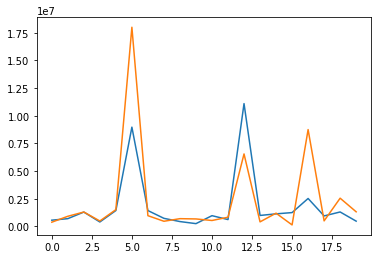

In [0]:
import matplotlib.pyplot as plt
#plotting the predictions for the first 20 obs
plt.plot(model.predict()[0:20])
#plotting the actual values for the first 20 obs 
plt.plot(Sales["SALE_PRICE"].values[0:20])


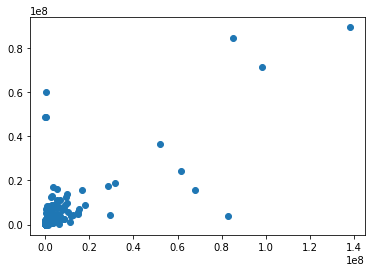

In [0]:
plt.scatter(Sales["SALE_PRICE"].values, model.predict())



##Statistics to measure model fit

For a linear regression, there are usually three important measurements we look at:

(1) Root Mean Square Error (RMSE)

It is defined as $\sqrt{\frac{1}{n} \sum_{i=1}^n(y_i-\widehat{y_i})^2}$

This is nothing but taking the square of the difference between the actual observation and the predicted values then sum of them up. We then take the square root to scale down the value. We would like the RMSE to be small.

(2) Coefficient of determination ($R^2$) [.rsquared]

$R^2$ is a very important statistics for linear regression. It measures the percentage of variation of the dependent variable that is explained by the indepedent variables. It ranges from 0 to 1. We would like this statistics to be high.

To compute this statistics, we need 

$1-\frac{\sum_{i=1}^n(y_i-\widehat{y_i})^2}{\sum_{i=1}^n(y_i-\bar{y_i})^2}$

(3) Adjusted $R^2$ [.rsquared_adj]

When adding in more variables, $R^2$ will keep on increasing. This might cause overfit. Adjusted $R^2$ is an alternative statistics we can use. It is defined as follows:

$\text{adjusted } R^2= 1-(1-R^2)*\frac{n-1}{n-k-1}$